In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

In [3]:
df = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/A+&+B+shingles.csv')
df.head()
df['B'].head(40)
df['B'].fillna(0, inplace=True)
df['B'].head(40)

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
31    0.00
32    0.00
33    0.00
34    0.00
35    0.00
Name: B, dtype: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.290,0.3925,0.72
B,36.0,0.235556,0.159256,0.00,0.1250,0.205,0.3750,0.58


In [5]:
# Check for missing value in any colum
df.isnull().sum()

A    0
B    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2DC2C4668>,
      dtype=object)

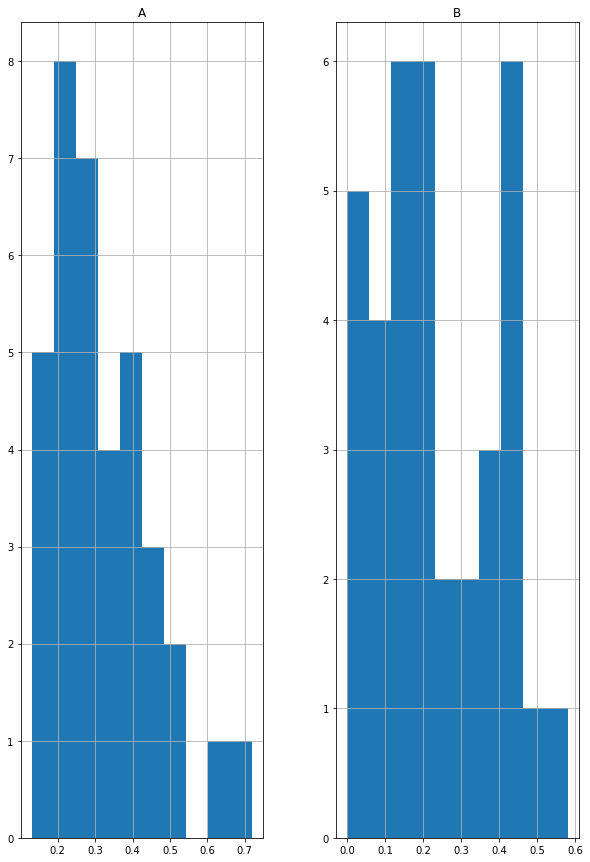

In [6]:
df.hist(figsize=(10,15))

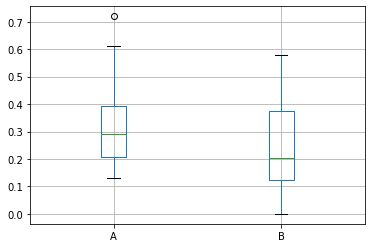

In [7]:
df.boxplot()

In [9]:
#Both the samples seems to be normally distributed.

#Mean and Median Values are little much different.

#Based on Histogram plot, Both A & B are normally distributed based on mean. DataFrame of B is little right skewed.

#Hypothesis Formulation

#Use the T Test: Paired two Sample for Means: Where as Sigma(Population Std dev is unknown here)

#Ho = Population Mean of A & B are equal

#Ha = Population of Mean A & B are not equal

# This follows two tailed test.

t, p_value  = stats.ttest_rel(df['A'],df['B'])  #Performing a paired t-test

print(t, p_value)

1.9891039820394145 0.05455084074006934


In [10]:
#Conclusion
#In this scenario, the p value is greater than the 0.05. 
#Hence accept the null hypothesis that the Population mean A & B are equal. (Fail to Reject Null Hypothesis)

#If we compare the means of the two sample distributions, we see that even though visually it seems as if A scheme has fared better, statistically it does not hold.
#The higher mean in the case of A can also be attributed to the higher variance compared to B.
#The variance of the B data set, 0.024658025, is  more than the variance of the first data set, 0.017911111.
#We are unsure of the sampling error present in the data.


#The probability of a type 1 error?
#The probability of a type 2 error?
#The power of the test?
#Type I error (𝜶): Probability of rejecting the null hypothesis when it is true. The probability of a Type I error in hypothesis testing is predetermined by the significance level.

#Type II error (𝜷) : Probability of failing to reject null when it is false. Type II error calculation depends on the population mean which is unknown.

#If alternate hypothesis 𝜇(New Scheme) – 𝜇(Old Scheme) = 𝜇𝑑 = 0.35(Population Mean) is true. What is the type I and II error.

#Null Hypothesis = 𝜇(New Scheme) – 𝜇(Old Scheme) = 𝜇𝑑 = 0
#First we need to calculate the probability of Type I error which is predetermined by significance level. If the significance level is 0.05,
#then type I error is 0.05. i.e. 5% probability we make Type I error – rejecting null hypothesis when it is true.
#Type II error calculation depends on a particular value of 𝜇. In this case lets assume difference of population 𝜇 is £5K. Lets also assume that the significance level for the test is 0.05. Then the calculation is as below :
#This is a right tailed test

from scipy.stats import t
value = abs(t.ppf(0.05, 29))
value


1.6991270265334977

In [11]:
#We fail to reject the null hypothesis (commit a type II error) if we get a T-statistic less than 1.699127 for the sample size of 30

#To begin with, we need to find the 𝐷̅ until we fail to reject the null hypothesis. Then we need to identify the probability of calculated 𝐷̅ appearing when the 𝜇𝑑 = £5000.

#𝑡𝑠𝑡𝑎𝑡=(𝑑̅− 𝜇𝐷)/𝑆𝑑√𝑛

#1.699=(d-0)/0.244666277/mt.sqrt(30)

d=1.699*0.04466
d

0.07587734

In [12]:
#The above calculation states that we will incorrectly fail to reject the null hypothesis as long as we draw samples where the difference of mean is less than £4.37K.

#Now given 𝜇old – 𝜇new = 0.35, we can compute the probability of drawing the sample mean difference lesser than 0.07587734 as follows:

tstat=(0.07587734-0.35)/0.04466
tstat

-6.137990595611285

In [13]:
#Probability of Type II Error
p = t.cdf(-6.137990595611285, 29)
p

5.457775824149693e-07

In [14]:
#Power of the Test:
#Power of the hypothesis test is 1 minus the probability of Type II error. Basically the power of a test is the probability that we make the right decision when the null is not correct (i.e. we correctly reject it)

print("Power of test is", 1- p )

Power of test is 0.9999994542224175


In [15]:
#What sample size would make the probabilities of type 1 and type 2 errors equal?
#Let us assume we need Type 1 error and Type 2 error equal to .05

#Assuming sample standard deviation is equal to population standard deviation, we can calculate sample size needed as below :

#Null hypothesis mean difference (M0) is 0
#Alternative hypothesis mean difference (Ma) is 0.35
#Sample standard Deviation is 0.244666277
#Alpha value is 0.05
#Beta value is 0.05 i.e. power of test is 0.95 = 95%
#Sample Size calculation :

import statsmodels.stats.power as smp
smp.tt_ind_solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.95, ratio=1.0, alternative='larger')

87.2626041764615

In [ ]:
#Hence, in order to retain the power, we need to round the value to next whole number. therefore, we may conclude that we need a sample size of 88 to get the Type I and Type II Errors equal
#However, our recommendation is that the test be carried out with a larger sample size to improve the accuracy of test result.